<a href="https://colab.research.google.com/github/faizuddin/IBB31103/blob/main/unsupervised_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Artificial Intelligence (IBB31103)

Algorithms belonging to the family of Unsupervised Learning have no variable to predict tied to the data. Instead of having an output, the data only has an input which would be multiple variables that describe the data. This is where clustering comes in.

## Clustering

Clustering is the task of **grouping together a set of objects in a way that objects in the same cluster are more similar to each other than to objects in other clusters**. Similarity is a metric that reflects the strength of relationship between two data objects.

## K-Means

K-Means falls under the category of centroid-based clustering. A centroid is a data point (imaginary or real) at the center of a cluster. In centroid-based clustering, clusters are represented by a central vector or a centroid. This centroid might not necessarily be a member of the dataset. 

## Clustering Iris dataset
In this exercise, we will use [Iris dataset](https://archive.ics.uci.edu/ml/datasets/iris).

In [41]:
#Import necessary libraries
import pandas as pd # data structure
import numpy as np # vectorisation
import matplotlib.pyplot as plt # visualisation
from sklearn.cluster import KMeans # K-Means algorithm
from sklearn import datasets # built-in dataset

Load the dataset

In [42]:
iris = datasets.load_iris()

Put them in a dataframe

In [45]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["species"] = iris.target

Quick view of the dataframe

In [48]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


To do the clustering we only need four features (sepal length, sepal width, petal length, and petal width) from the table. So we can substract these columns into new variable called ‘x’.

In [49]:
x = df.iloc[:, 0:3]

After substract the columns, now we want to substract the values into an array table using numpy array function.

In [50]:
x  = np.array(x)

### Find the optimal number of clusters.
So, before we implement the k-means and assign the centers of our data, we can also make a quick analyse to find the optimal number (centers) of clusters using [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)).

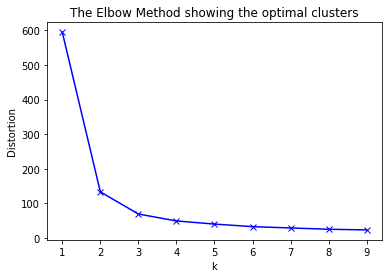

In [51]:
# Collecting the distortions into list
distortions = []
K = range(1,10)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(x)
  distortions.append(kmeanModel.inertia_)

# Plotting the distortions
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal clusters')
plt.show()

From the line-chart above, we can observe that the “elbow” is the number 3 which is the optimal clusters (center) in this case.

Next step is to implement [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering with 3 centroids.

In [63]:
# Define the model, by default KMeans uses Euclidean distance metric
kmeans_model = KMeans(n_clusters=3)

# Fit into our dataset fit
kmeans_predict = kmeans_model.fit_predict(x)

From this step, we have already made 3 clusters within 0, 1, and 2 numbers.

In [64]:
kmeans_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

Merge the result of the clusters with our original data table like this:

In [65]:
df["Cluster"] = kmeans_predict
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,Cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0
146,6.3,2.5,5.0,1.9,2,2
147,6.5,3.0,5.2,2.0,2,0
148,6.2,3.4,5.4,2.3,2,0


Final step to visualise our clusters so we can actually see the model of the clusters.

Centroids coordinates are stored in `cluster_centers_` vector.

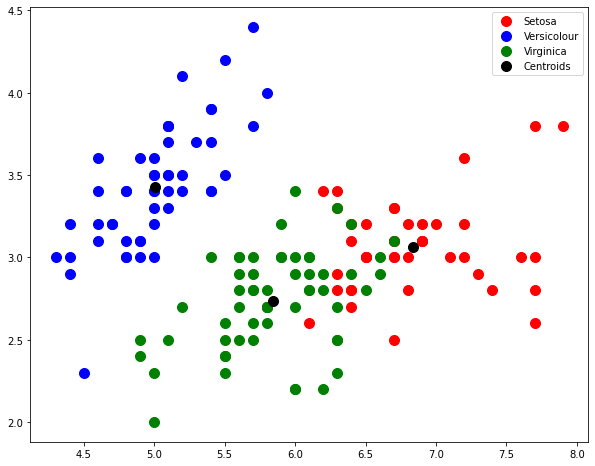

In [66]:
# Set figure size
plt.figure(figsize=(10,8))

# Visualising the clusters
plt.scatter(x[kmeans_predict == 0, 0], x[kmeans_predict == 0, 1], s = 100, c = 'red', label = 'Setosa')
plt.scatter(x[kmeans_predict == 1, 0], x[kmeans_predict == 1, 1], s = 100, c = 'blue', label = 'Versicolour')
plt.scatter(x[kmeans_predict == 2, 0], x[kmeans_predict == 2, 1], s = 100, c = 'green', label = 'Virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.legend()